In [9]:
import os
os.makedirs("../outputs/figures", exist_ok=True)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load raw dataset
df = pd.read_csv("../data/raw/restaurant_ratings.csv")

# Basic info
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
# Dataset overview
print(df.shape)
df.info()
df.describe()


(9551, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to 

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [3]:
# Missing values
df.isnull().sum().sort_values(ascending=False)


Cuisines                9
Restaurant Name         0
Country Code            0
City                    0
Restaurant ID           0
Address                 0
Locality                0
Longitude               0
Locality Verbose        0
Latitude                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

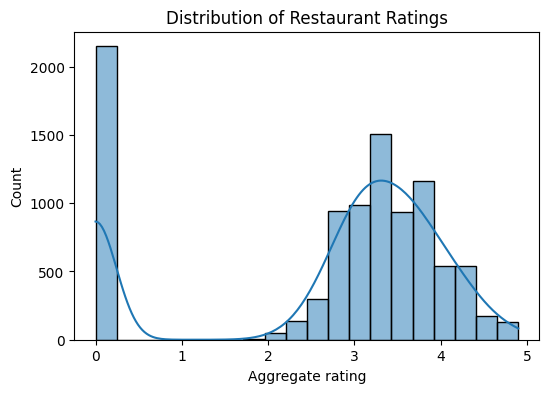

In [4]:
# Distribution of target variable
plt.figure(figsize=(6,4))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title("Distribution of Restaurant Ratings")
plt.show()


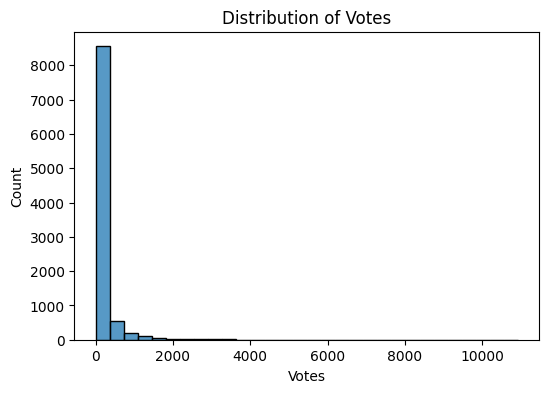

In [5]:
# Votes distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Votes'], bins=30, kde=False)
plt.title("Distribution of Votes")
plt.show()


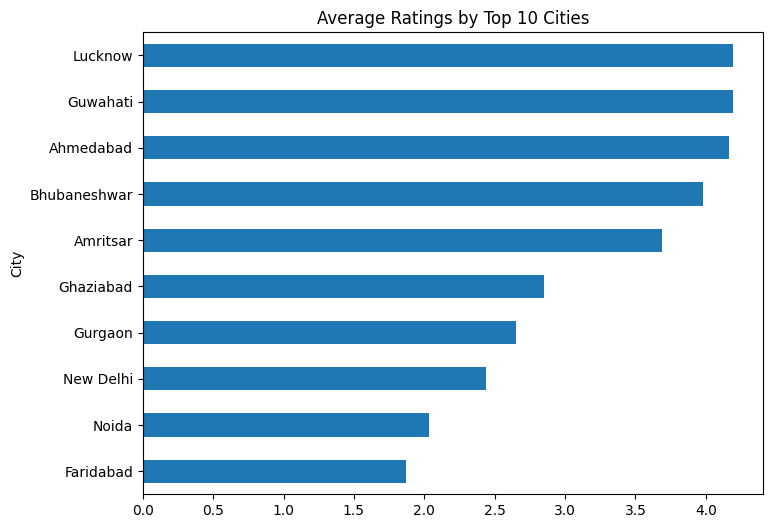

In [6]:
# Average rating by city (top 10 cities)
top_cities = df['City'].value_counts().head(10).index
city_ratings = df[df['City'].isin(top_cities)].groupby('City')['Aggregate rating'].mean().sort_values()

city_ratings.plot(kind='barh', figsize=(8,6))
plt.title("Average Ratings by Top 10 Cities")
plt.show()


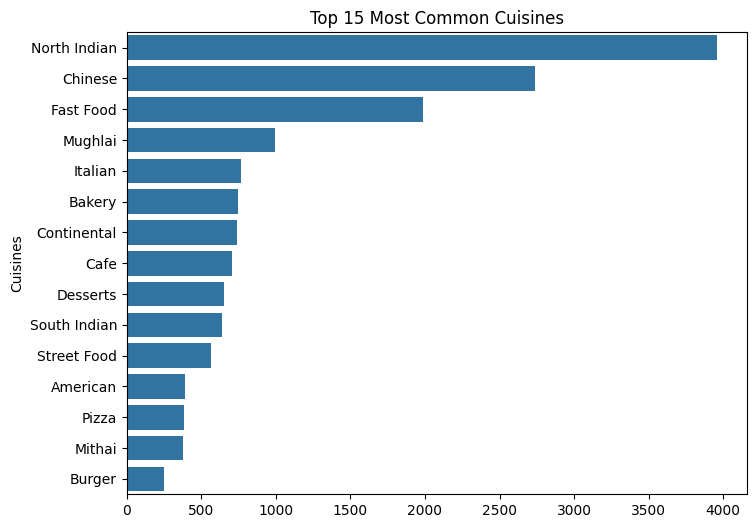

In [7]:
# Top cuisines
top_cuisines = df['Cuisines'].dropna().str.split(',').explode().str.strip().value_counts().head(15)
plt.figure(figsize=(8,6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title("Top 15 Most Common Cuisines")
plt.show()


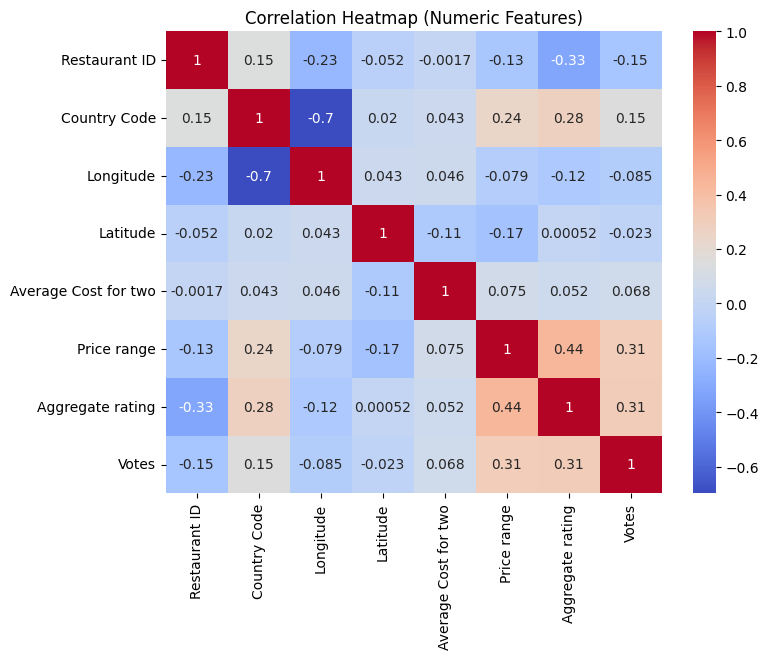

In [8]:
# Correlation heatmap (numeric only)
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


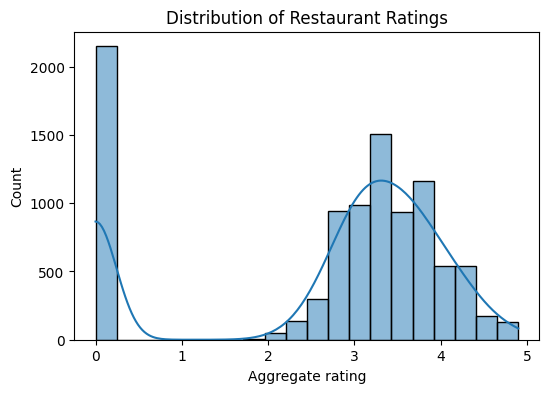

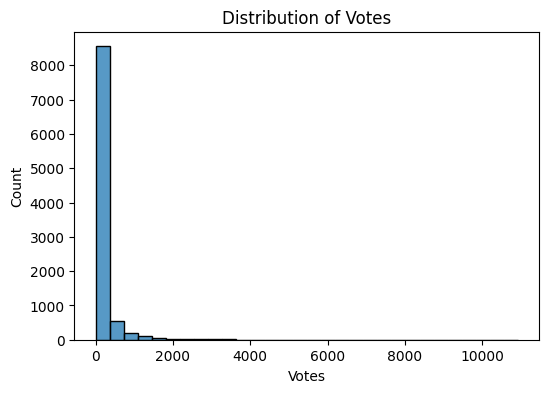

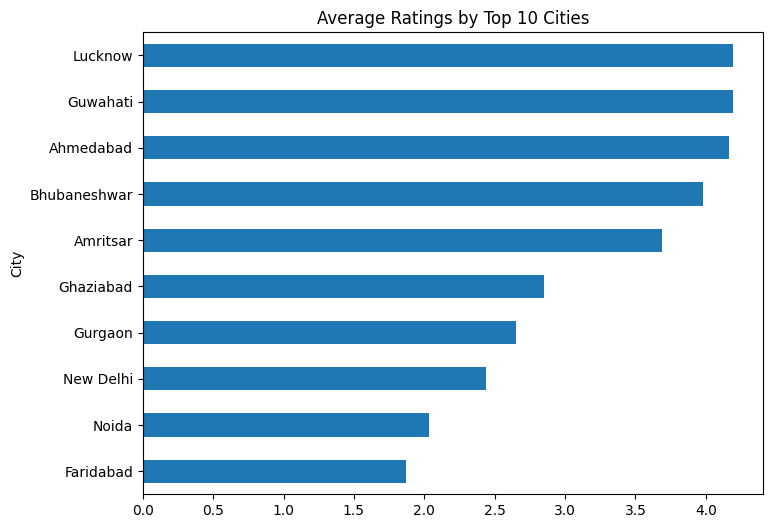

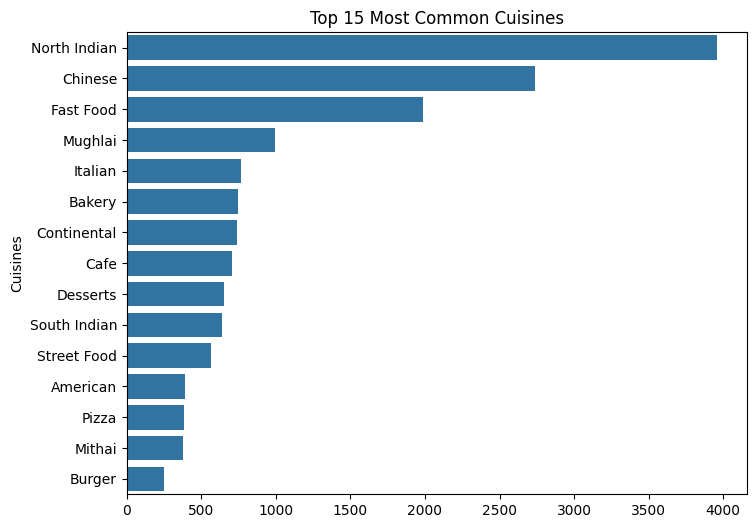

In [10]:
# Rating distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title("Distribution of Restaurant Ratings")
plt.savefig("../outputs/figures/rating_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

# Votes distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Votes'], bins=30, kde=False)
plt.title("Distribution of Votes")
plt.savefig("../outputs/figures/votes_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

# Average ratings by city
plt.figure(figsize=(8,6))
city_ratings.plot(kind='barh')
plt.title("Average Ratings by Top 10 Cities")
plt.savefig("../outputs/figures/city_ratings.png", dpi=300, bbox_inches="tight")
plt.show()

# Top cuisines
plt.figure(figsize=(8,6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title("Top 15 Most Common Cuisines")
plt.savefig("../outputs/figures/top_cuisines.png", dpi=300, bbox_inches="tight")
plt.show()
